Colab 可以透過兩種方式存取 Google Drive 的檔案：

**1. 透過檔案共用連結**

  一般來說，Google Drive 的檔案連結會是類似下面的結構：

https://drive.google.com/file/d/1fGStFYMLXJgKAuqUkLMoPVNfyqT8DLQm/view?usp=sharing
  
  其中 "open?id=" 後面的那一串亂碼稱為 **file_id**

  在 colab 中，我們可以直接用 **file_id** 下載檔案，優點是這個過程不需要再手動輸入任何訊息，但缺點是下載下來的檔案在程式執行完畢後就會消失，也就是每一次都必須重新下載，使得執行時間增加。

In [1]:
# 下載 file_id 為 "1fGStFYMLXJgKAuqUkLMoPVNfyqT8DLQm" 的檔案，並將它命名為 Minori.jpg
!gdown --id '1fGStFYMLXJgKAuqUkLMoPVNfyqT8DLQm' --output Minori.jpg
# 列出目前目錄下所有的檔案
!ls

Downloading...
From: https://drive.google.com/uc?id=1fGStFYMLXJgKAuqUkLMoPVNfyqT8DLQm
To: /content/Minori.jpg
100% 219k/219k [00:00<00:00, 1.98MB/s]
Minori.jpg  sample_data


**2. 掛載自己的 Google Drive**

  透過 Google 提供的套件，我們可以讓 Colab 上的程式直接讀取自己的雲端硬碟。
  這個方法的好處是只要檔案存在於自己的雲端硬碟，就隨時都可以直接存取；相對地，缺點就是使用者得手動將檔案加入，並且在程式運行時要輸入連結 Google Drive 所需要的授權碼。

In [2]:
# OpenCV 套件，和 Google Drive 無關
import cv2
# import Google Drive 套件
from google.colab import drive
# 將自己的雲端硬碟掛載上去
drive.mount('/content/gdrive')
# 透過 gdrive/My Drive/... 來存取檔案
img = cv2.imread('gdrive/My Drive/Minori.jpg')

Mounted at /content/gdrive


---
### 實例 <a href="https://archive.ics.uci.edu/ml/datasets/Iris" target="_blank" title="Iris data set">Iris data set</a>
#### 問題描述: 根據花的萼片(sepal)長度與寬度及花瓣(petal)長度與寬度，辨識是下面三種鳶尾屬植物中的哪一種。
<br>
<div>
    <img src="attachment:iris.png" width="500">
</div>


#### 問題定義:找到一個分類器$f(x_{1},x_{2},x_{3},x_{4}):\mathbb{R}^{4}\rightarrow \mathbb{R}^{3}$ (or $\{0,1,2\}$)，根據花的萼片(sepal)長度與寬度及花瓣(petal)長度與寬度(分別為$x_{1},x_{2},x_{3},x_{4}$)，輸出此花的種類。

分類器是$f(x_{1},x_{2},x_{3},x_{4}):\mathbb{R}^{4}\rightarrow \mathbb{R}^{3}$其輸出通常與事後機率$p(山鳶尾|x_{1},x_{2},x_{3},x_{4})$, $p(變色鳶尾|x_{1},x_{2},x_{3},x_{4})$, $p(維吉尼亞鳶尾|x_{1},x_{2},x_{3},x_{4})$有關
\begin{equation}
f(x_{1},x_{2},x_{3},x_{4}) = \left[
\begin{array}{l}
p(山鳶尾|x_{1},x_{2},x_{3},x_{4})\\
p(變色鳶尾|x_{1},x_{2},x_{3},x_{4})\\
p(維吉尼亞鳶尾|x_{1},x_{2},x_{3},x_{4})\\
\end{array}
\right]
\end{equation}
注意$p(山鳶尾|x_{1},x_{2},x_{3},x_{4})+p(變色鳶尾|x_{1},x_{2},x_{3},x_{4})+p(維吉尼亞鳶尾|x_{1},x_{2},x_{3},x_{4})=1$。因此$f(x_{1},x_{2},x_{3},x_{4})$輸出裡最大那個成份所對應的花的類別就是辨識結果。分類器是$f(x_{1},x_{2},x_{3},x_{4}):\mathbb{R}^{4}\rightarrow \{0,1,2\}$的形式，通常也可以取得事後機率的估計。

#### 檢視步驟1與2的結果
假設經步驟1與2處理後，資料擺放在'iris.xlsx'此excel檔案裏。注意要擺放'iris.xlsx'在這個.ipynb檔案同一個目錄下。
<div>
    <img src="attachment:iris_dataset.png" width="250">
</div> 

In [3]:
import sklearn.datasets as ds
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Python/Machine_Learning

#讀入資料
csv = pd.read_csv('fish-monetary-stock-account-1996-2019.csv', encoding='utf-8')
csv.to_excel('fish-monetary-stock-account-1996-2019.xlsx', sheet_name='data')

fish_monetary_df = pd.read_excel('fish-monetary-stock-account-1996-2019.xlsx')
print('total # of examples:{}'.format(len(fish_monetary_df)))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Python/Machine_Learning
total # of examples:5333


顯示前10筆資料
也可以使用指令 iris_df.head(10)，iris_df.head()顯示前5筆資料。

In [4]:
# fish_monetary_df[:10]
fish_monetary_df.head(10)

,Unnamed: 0,species,year,variable,units,magnitude,source,data_value,flag
0,0,Alfonsino & Long-finned Beryx,1996,Asset value,Dollars,Millions,Environmental Accounts,20.3,NaN
1,1,Alfonsino & Long-finned Beryx,1996,TACC,Tonnes,Actual,Environmental Accounts,2721.9,NaN
2,2,Alfonsino & Long-finned Beryx,1997,Asset value,Dollars,Millions,Environmental Accounts,32.6,NaN
3,3,Alfonsino & Long-finned Beryx,1997,TACC,Tonnes,Actual,Environmental Accounts,2721.1,NaN
4,4,Alfonsino & Long-finned Beryx,1998,Asset value,Dollars,Millions,Environmental Accounts,31.2,NaN
5,5,Alfonsino & Long-finned Beryx,1998,TACC,Tonnes,Actual,Environmental Accounts,2727.0,NaN
6,6,Alfonsino & Long-finned Beryx,1999,Asset value,Dollars,Millions,Environmental Accounts,31.4,NaN
7,7,Alfonsino & Long-finned Beryx,1999,TACC,Tonnes,Actual,Environmental Accounts,2727.5,NaN
8,8,Alfonsino & Long-finned Beryx,2000,Asset value,Dollars,Millions,Environmental Accounts,17.8,NaN
9,9,Alfonsino & Long-finned Beryx,2000,TACC,Tonnes,Actual,Environmental Accounts,2726.7,NaN


In [5]:
#觀察第90筆資料至第99筆資料
fish_monetary_df[90:100]

,Unnamed: 0,species,year,variable,units,magnitude,source,data_value,flag
90,90,All species,2005,Asset value,Dollars,Millions,Environmental Accounts,4320.0,NaN
91,91,All species,2005,Catch,Tonnes,Actual,Environmental Accounts,469490.8,NaN
92,92,All species,2005,Discount rate,Number,Actual,Environmental Accounts,7.0,NaN
93,93,All species,2005,TACC,Tonnes,Actual,Environmental Accounts,595176.8,NaN
94,94,All species,2006,Asset value,Dollars,Millions,Environmental Accounts,4018.8,NaN
95,95,All species,2006,Catch,Tonnes,Actual,Environmental Accounts,452408.8,NaN
96,96,All species,2006,Discount rate,Number,Actual,Environmental Accounts,7.8,NaN
97,97,All species,2006,TACC,Tonnes,Actual,Environmental Accounts,595469.4,NaN
98,98,All species,2007,Asset value,Dollars,Millions,Environmental Accounts,3872.8,NaN
99,99,All species,2007,Catch,Tonnes,Actual,Environmental Accounts,441711.1,NaN


In [6]:
#觀察第140筆資料至最後
fish_monetary_df[140:]

,Unnamed: 0,species,year,variable,units,magnitude,source,data_value,flag
140,140,All species,2017,Discount rate,Number,Actual,Environmental Accounts,5.0,NaN
141,141,All species,2017,TACC,Tonnes,Actual,Environmental Accounts,592452.2,NaN
142,142,All species,2018,Asset value,Dollars,Millions,Environmental Accounts,8965.8,R
143,143,All species,2018,Catch,Tonnes,Actual,Environmental Accounts,396773.7,R
144,144,All species,2018,Discount rate,Number,Actual,Environmental Accounts,4.4,R
...,...,...,...,...,...,...,...,...,...
5328,5328,Yellowfin Tuna,2018,Catch,Tonnes,Actual,Environmental Accounts,23.1,NaN
5329,5329,Yellowfin Tuna,2018,TACC,Tonnes,Actual,Environmental Accounts,263.0,NaN
5330,5330,Yellowfin Tuna,2019,Asset value,Dollars,Millions,Environmental Accounts,0.4,P
5331,5331,Yellowfin Tuna,2019,Catch,Tonnes,Actual,Environmental Accounts,4.9,P


In [13]:
#只揀選特定欄來觀察
# fish_monetary_df.reset_index(inplace=True)
fish_monetary_df.set_index("species" , inplace=True)
print(fish_monetary_df.iloc[:10,[1,2,3]])
print("-------------------")
fish_monetary_df.reset_index(inplace=True)
fish_monetary_df.iloc[:10,[1,0]]


                               year     variable    units
species                                                  
Alfonsino & Long-finned Beryx  1996  Asset value  Dollars
Alfonsino & Long-finned Beryx  1996         TACC   Tonnes
Alfonsino & Long-finned Beryx  1997  Asset value  Dollars
Alfonsino & Long-finned Beryx  1997         TACC   Tonnes
Alfonsino & Long-finned Beryx  1998  Asset value  Dollars
Alfonsino & Long-finned Beryx  1998         TACC   Tonnes
Alfonsino & Long-finned Beryx  1999  Asset value  Dollars
Alfonsino & Long-finned Beryx  1999         TACC   Tonnes
Alfonsino & Long-finned Beryx  2000  Asset value  Dollars
Alfonsino & Long-finned Beryx  2000         TACC   Tonnes
-------------------


,Unnamed: 0,species
0,0,Alfonsino & Long-finned Beryx
1,1,Alfonsino & Long-finned Beryx
2,2,Alfonsino & Long-finned Beryx
3,3,Alfonsino & Long-finned Beryx
4,4,Alfonsino & Long-finned Beryx
5,5,Alfonsino & Long-finned Beryx
6,6,Alfonsino & Long-finned Beryx
7,7,Alfonsino & Long-finned Beryx
8,8,Alfonsino & Long-finned Beryx
9,9,Alfonsino & Long-finned Beryx


觀察數值型態資料統計值

In [14]:
fish_monetary_df.describe()

,Unnamed: 0,year,data_value
count,5333.000000,5333.000000,5086.000000
mean,2666.000000,2010.115320,8955.347778
std,1539.648824,5.854674,52514.213218
min,0.000000,1996.000000,0.000000
25%,1333.000000,2006.000000,20.400000
50%,2666.000000,2011.000000,290.500000
75%,3999.000000,2015.000000,2178.500000
max,5332.000000,2019.000000,717348.500000


可以檢視特徵有多少不同的值
顯示有幾種不同的species，就是看class欄有幾個不同的值

對數值型態資料可顯示其直方圖

In [16]:
print(fish_monetary_df['species'].unique())

['Alfonsino & Long-finned Beryx' 'All species' 'Anchovy' 'Arrow Squid'
 'Barracouta' 'Bigeye Tuna' 'Black Cardinal Fish' 'Bladder Kelp'
 'Blue Cod' 'Blue Mackerel' 'Blue Moki' 'Blue Shark' 'Blue Warehou'
 'Bluenose' 'Butterfish' 'Cockle' 'Deepwater (King) Clam'
 'Deepwater Tuatua' 'Elephant Fish' 'Flats'
 'Freshwater Eels (South Island)' 'Frilled Venus Shell' 'Frostfish'
 'Garfish' 'Gemfish' 'Ghost Shark' 'Giant Spider Crab'
 'Green-lipped Mussel' 'Grey Mullet' 'Gurnard' 'Hake' 'Hapuku & Bass'
 'Hoki' 'Horse Mussel' 'Jack Mackerel' 'John Dory' 'Kahawai' 'Kina'
 'King Crab' 'Kingfish' 'Knobbed Whelk' 'Large Trough Shell'
 'Leatherjacket' 'Ling' 'Long-finned Freshwater Eel' 'Lookdown Dory'
 'Mako Shark' 'Moonfish' 'Orange Roughy' 'Oreos' 'Oysters Dredge'
 'Pacific Bluefin Tuna' 'Paddle Crab' 'Pale Ghost Shark' 'Parore'
 'Patagonian Toothfish' 'Paua' 'Pilchard' 'Pipi' 'Porae' 'Porbeagle Shark'
 'Prawn Killer' 'Queen Scallop' 'Rays Bream' 'Red Bait' 'Red Cod'
 'Red Crab' 'Red Snapper' 'Rib

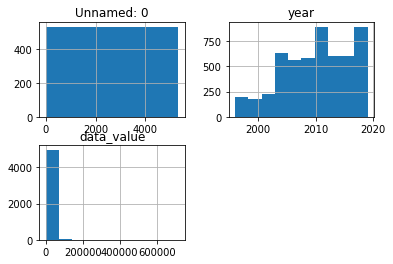

In [17]:
fish_monetary_df.hist()
plt.show()

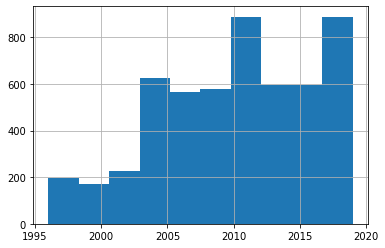

In [21]:
fish_monetary_df['year'].hist(bins=10)

可以檢視特徵其不同的值出現次數

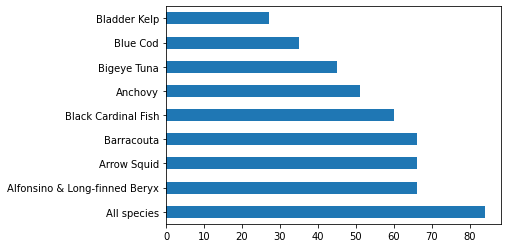

In [26]:
fish_monetary_df['species'][:500].value_counts().plot(kind='barh')

Text(0.5, 0, 'average data value')

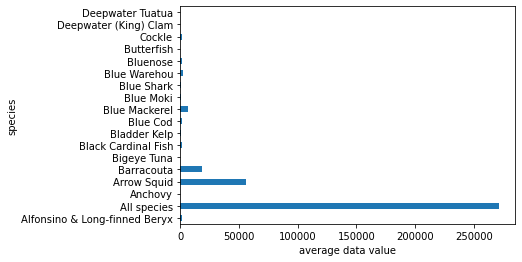

In [32]:
fish_monetary_df[:1000].groupby('species')['data_value'].mean().plot(kind='barh').set_xlabel('average data value')

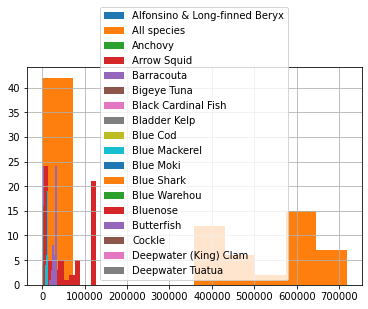

In [35]:
fig,ax=plt.subplots()
p=fish_monetary_df[:1000].groupby('species')['data_value'].hist(ax=ax)
plt.legend([x for x in p.keys()])
plt.show()

根據每一對特徵與species描繪描繪資料分布

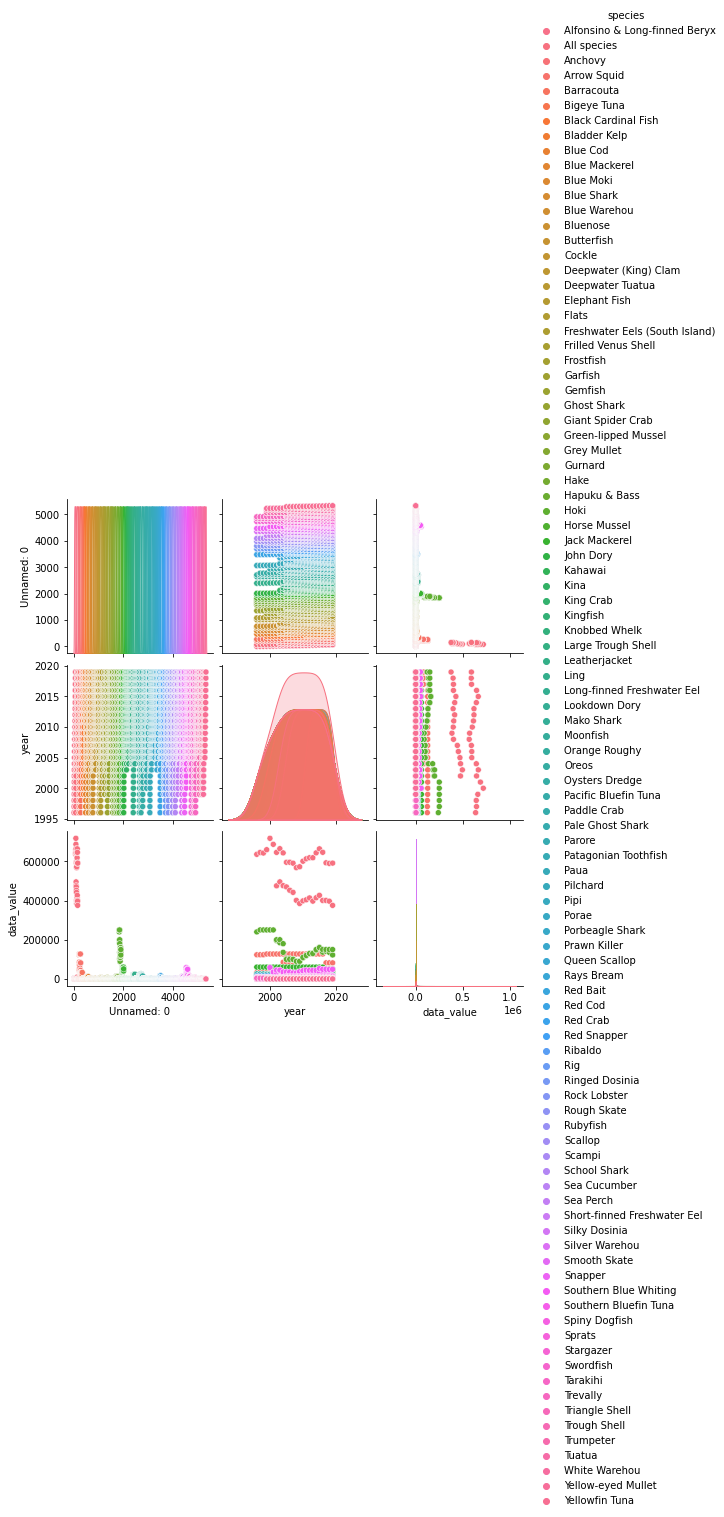

In [36]:
import seaborn as sns
sns.pairplot(fish_monetary_df,hue="species"); # hue="species" 顏色由species欄(在此資料集是樣本的類別)決定